In [1900]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')
sns.set(style='whitegrid', color_codes=True)
import statistics
import scipy
import re
import math

# Data Acquisition

In [1901]:
def acquire():
    data = pd.read_csv('data/attacks.csv', encoding = 'ISO-8859-1', sep=',')
    return data

# Data Wrangling

In [1902]:
df.shape

(6302, 24)

In [1903]:
df = acquire()
col_names  = []
col_names  = df.columns
clean_col  = [i.replace('.',' ').upper().strip() for i in col_names]
clean_col  = [i.strip() for i in clean_col]
df.columns = clean_col
ordered_col = sorted(clean_col)
df = df[ordered_col]

# I will drop UNNAMED: 22 and UNNAMED: 23 because these columns are empty
#if 'UNNAMED: 22' in df.columns:
    #df.drop('UNNAMED: 22', axis = 1, inplace = True)
#if 'UNNAMED: 23' in df.columns:
    #df.drop('UNNAMED: 23', axis = 1, inplace = True)

df.tail()

,ACTIVITY,AGE,AREA,CASE NUMBER,CASE NUMBER 1,CASE NUMBER 2,COUNTRY,DATE,FATAL (Y/N),HREF,...,NAME,ORIGINAL ORDER,PDF,SEX,SPECIES,TIME,TYPE,UNNAMED: 22,UNNAMED: 23,YEAR
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25722,NaN,NaN,NaN,xx,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1904]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ACTIVITY                5758 non-null   object 
 1   AGE                     3471 non-null   object 
 2   AREA                    5847 non-null   object 
 3   CASE NUMBER             8702 non-null   object 
 4   CASE NUMBER 1           6302 non-null   object 
 5   CASE NUMBER 2           6302 non-null   object 
 6   COUNTRY                 6252 non-null   object 
 7   DATE                    6302 non-null   object 
 8   FATAL (Y/N)             5763 non-null   object 
 9   HREF                    6302 non-null   object 
 10  HREF FORMULA            6301 non-null   object 
 11  INJURY                  6274 non-null   object 
 12  INVESTIGATOR OR SOURCE  6285 non-null   object 
 13  LOCATION                5762 non-null   object 
 14  NAME                    6092 non-null 

I will drop duplicate values

In [1905]:
df.drop_duplicates(keep = 'first', inplace = True)
df.reset_index(drop=True, inplace = True)
df.tail(11)

,ACTIVITY,AGE,AREA,CASE NUMBER,CASE NUMBER 1,CASE NUMBER 2,COUNTRY,DATE,FATAL (Y/N),HREF,...,NAME,ORIGINAL ORDER,PDF,SEX,SPECIES,TIME,TYPE,UNNAMED: 22,UNNAMED: 23,YEAR
6301,Swimming,15,Eastern Province,ND.0001,ND.0001,ND.0001,CEYLON (SRI LANKA),1845-1853,Y,http://sharkattackfile.net/spreadsheets/pdf_di...,...,male,2.0,ND-0001-Ceylon.pdf,M,NaN,NaN,Unprovoked,NaN,NaN,0.0
6302,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,6304.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6303,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,6305.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6304,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,6306.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6305,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,6307.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6306,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,6308.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6307,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,6309.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6308,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,6310.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6309,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1906]:
df.shape

(6312, 24)

If a row has more than a half NaN values I will drop the row because it has no significant information to analyze and only makes noise.

In [1907]:
for i in range(df.shape[0]):
    lst = []
    for j in oredered_col:
        try:
            x = math.isnan(df[j][i])
            if x:
                lst.append(str(x))
        except:
            x = False
    if len(lst) > 11:
        df.drop(i, axis = 0, inplace = True)
df.tail()

,ACTIVITY,AGE,AREA,CASE NUMBER,CASE NUMBER 1,CASE NUMBER 2,COUNTRY,DATE,FATAL (Y/N),HREF,...,NAME,ORIGINAL ORDER,PDF,SEX,SPECIES,TIME,TYPE,UNNAMED: 22,UNNAMED: 23,YEAR
6297,Diving,NaN,Western Australia,ND.0005,ND.0005,ND.0005,AUSTRALIA,Before 1903,Y,http://sharkattackfile.net/spreadsheets/pdf_di...,...,male,6.0,ND-0005-RoebuckBay.pdf,M,NaN,NaN,Unprovoked,NaN,NaN,0.0
6298,Pearl diving,NaN,Western Australia,ND.0004,ND.0004,ND.0004,AUSTRALIA,Before 1903,Y,http://sharkattackfile.net/spreadsheets/pdf_di...,...,Ahmun,5.0,ND-0004-Ahmun.pdf,M,NaN,NaN,Unprovoked,NaN,NaN,0.0
6299,Swimming,NaN,North Carolina,ND.0003,ND.0003,ND.0003,USA,1900-1905,Y,http://sharkattackfile.net/spreadsheets/pdf_di...,...,Coast Guard personnel,4.0,ND-0003-Ocracoke_1900-1905.pdf,M,NaN,NaN,Unprovoked,NaN,NaN,0.0
6300,NaN,NaN,NaN,ND.0002,ND.0002,ND.0002,PANAMA,1883-1889,Y,http://sharkattackfile.net/spreadsheets/pdf_di...,...,Jules Patterson,3.0,ND-0002-JulesPatterson.pdf,M,NaN,NaN,Unprovoked,NaN,NaN,0.0
6301,Swimming,15,Eastern Province,ND.0001,ND.0001,ND.0001,CEYLON (SRI LANKA),1845-1853,Y,http://sharkattackfile.net/spreadsheets/pdf_di...,...,male,2.0,ND-0001-Ceylon.pdf,M,NaN,NaN,Unprovoked,NaN,NaN,0.0


In [1908]:
df.shape

(6302, 24)

In [1909]:
df1 = df.copy()

As the majority of CASE NUMBER 1, CASE NUMBER 2 and CASE NUMBER values are the same, I will set the missing value of CASE NUMBER to be the same of the row of CASE NUMBER 1.

In [1910]:
for i in range(df1.shape[0]):
    try:
        x = math.isnan(df1['CASE NUMBER'][i])
    except:
        continue
    if x:
        df1['CASE NUMBER'][i] = df['CASE NUMBER 1'][i]

<ipython-input-1910-e6ac985bf3e9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['CASE NUMBER'][i] = df['CASE NUMBER 1'][i]


In [1911]:
df1.isna().sum()

ACTIVITY                   544
AGE                       2831
AREA                       455
CASE NUMBER                  0
CASE NUMBER 1                0
CASE NUMBER 2                0
COUNTRY                     50
DATE                         0
FATAL (Y/N)                539
HREF                         0
HREF FORMULA                 1
INJURY                      28
INVESTIGATOR OR SOURCE      17
LOCATION                   540
NAME                       210
ORIGINAL ORDER               0
PDF                          0
SEX                        565
SPECIES                   2838
TIME                      3354
TYPE                         4
UNNAMED: 22               6301
UNNAMED: 23               6300
YEAR                         2
dtype: int64

# Cleaning column AGE

In [1912]:
df1['AGE'] = df1['AGE'].fillna('Unknown')
df1['AGE'] = df1['AGE'].str.strip()
df1['AGE'].unique()

array(['57', '11', '48', 'Unknown', '18', '52', '15', '12', '32', '10',
       '21', '34', '30', '60', '33', '29', '54', '41', '37', '56', '19',
       '25', '69', '38', '55', '35', '46', '45', '14', '40s', '28', '20',
       '24', '26', '49', '22', '7', '31', '17', '40', '13', '42', '3',
       '8', '50', '16', '82', '73', '20s', '68', '51', '39', '58', 'Teen',
       '47', '61', '65', '36', '66', '43', '60s', '9', '72', '59', '6',
       '27', '64', '23', '71', '44', '62', '63', '70', '18 months', '53',
       '30s', '50s', 'teen', '77', '74', '28 & 26', '5', '86', '18 or 20',
       '12 or 13', '46 & 34', '28, 23 & 30', 'Teens', '36 & 26',
       '8 or 10', '84', '', '30 or 36', '6½', '21 & ?', '75', '33 or 37',
       'mid-30s', '23 & 20', '7      &    31', '20?', "60's", '32 & 30',
       '16 to 18', '87', '67', 'Elderly', 'mid-20s', 'Ca. 33', '21 or 26',
       '>50', '18 to 22', 'adult', '9 & 12', '? & 19', '9 months',
       '25 to 35', '23 & 26', '1', '(adult)', '33 & 37', '25

In [1913]:
def age_clean(x):
    if re.search(r'[a-zA-Z½\s\D\W]',x) != None:
        return 'Unknown'
    else:
        return x

In [1914]:
df1['AGE'] =df1['AGE'].apply(age_clean)
df1['AGE'] = df1['AGE'].fillna('Unknown')
df1['AGE'] = df1['AGE'].str.replace(' ', 'Unknown')
df1['AGE'].unique()[:25]

array(['57', '11', '48', 'Unknown', '18', '52', '15', '12', '32', '10',
       '21', '34', '30', '60', '33', '29', '54', '41', '37', '56', '19',
       '25', '69', '38', '55'], dtype=object)

# Cleaning column SEX

In [1915]:
df1['SEX'].value_counts()

M      5094
F       637
M         2
N         2
.         1
lli       1
Name: SEX, dtype: int64

In [1916]:
df1['SEX'].unique()

array(['F', 'M', nan, 'M ', 'lli', 'N', '.'], dtype=object)

In [1917]:
df1['SEX'] = df1['SEX'].fillna('Unknown')
df1['SEX'] = df1['SEX'].str.replace('.', 'Unknown')
df1['SEX'] = df1['SEX'].str.replace('lli', 'Unknown')
df1['SEX'] = df1['SEX'].str.replace('N', 'M') # I will replace N with M because in the keyboard are toghether so it is probable that the user made a mistake
df1['SEX'] = df1['SEX'].str.strip()

In [1918]:
df1['SEX'].unique()

array(['F', 'M', 'Unknown'], dtype=object)

In [1919]:
df1.isna().sum()

ACTIVITY                   544
AGE                          0
AREA                       455
CASE NUMBER                  0
CASE NUMBER 1                0
CASE NUMBER 2                0
COUNTRY                     50
DATE                         0
FATAL (Y/N)                539
HREF                         0
HREF FORMULA                 1
INJURY                      28
INVESTIGATOR OR SOURCE      17
LOCATION                   540
NAME                       210
ORIGINAL ORDER               0
PDF                          0
SEX                          0
SPECIES                   2838
TIME                      3354
TYPE                         4
UNNAMED: 22               6301
UNNAMED: 23               6300
YEAR                         2
dtype: int64

# Cleaning column AREA

In [1920]:
df2 = df1.copy()

In [1921]:
df2['AREA'] = df2['AREA'].fillna('Unknown')
df2['AREA'] = df2['AREA'].str.strip()
df2['AREA'] = df2['AREA'].str.replace('','')
df2['AREA'] = df2['AREA'].str.replace('?','')
df2['AREA'] = df2['AREA'].str.replace('"','')
df2['AREA'] = df2['AREA'].str.replace('º','')
#df2['AREA'].value_counts()
df2['AREA'].value_counts()[:10]

Florida                  1038
New South Wales           486
Unknown                   455
Queensland                312
Hawaii                    298
California                290
KwaZulu-Natal             213
Western Cape Province     195
Western Australia         189
South Carolina            161
Name: AREA, dtype: int64

# Cleaning COUNTRY

In [1922]:
df3 = df2.copy()

In [1923]:
df3['COUNTRY'] = df3['COUNTRY'].fillna('Unknown')
df3['COUNTRY'] = df3['COUNTRY'].astype(str)
df3['COUNTRY'] = df3['COUNTRY'].apply(lambda x: x.upper() if bool(x.lower()) else x.upper())
df3['COUNTRY'] = df3['COUNTRY'].str.strip()
df3['COUNTRY'] = df3['COUNTRY'].replace('?','')
#df3['COUNTRY'].value_counts()
df3['COUNTRY'].value_counts()[:10]

USA                 2229
AUSTRALIA           1338
SOUTH AFRICA         579
PAPUA NEW GUINEA     134
NEW ZEALAND          128
BRAZIL               112
BAHAMAS              109
MEXICO                90
ITALY                 71
FIJI                  65
Name: COUNTRY, dtype: int64

# Cleaning FATAL

In [1924]:
df4 = df3.copy()

In [1925]:
df4['FATAL (Y/N)'].value_counts()

N          4293
Y          1388
UNKNOWN      71
 N            7
M             1
2017          1
N             1
y             1
Name: FATAL (Y/N), dtype: int64

In [1926]:
#def fatal_clean(x):
#    if bool(re.search(r'\d', x)):
#        return 'UNKNOWN'

In [1927]:
df4['FATAL (Y/N)'] = df4['FATAL (Y/N)'].fillna('UNKNOWN')
df4['FATAL (Y/N)'] = df4['FATAL (Y/N)'].astype(str)
df4['FATAL (Y/N)'] = df4['FATAL (Y/N)'].str.strip()
df4['FATAL (Y/N)'] = df4['FATAL (Y/N)'].str.replace('M','N') #I will replace M with N as it is highly probable to be a typo because M and N are together in the keyboard
df4['FATAL (Y/N)'] = df4['FATAL (Y/N)'].str.replace('2017','UNKNOWN')
#df4['FATAL (Y/N)'] = df4['FATAL (Y/N)'].apply(fatal_clean)
df4['FATAL (Y/N)'] = df4['FATAL (Y/N)'].apply(lambda x: x.upper() if bool(x.lower()) else x.upper())
df4['FATAL (Y/N)'].value_counts()

N          4302
Y          1389
UNKNOWN     611
Name: FATAL (Y/N), dtype: int64

# Cleaning COUNTRY

In [1928]:
df5 = df4.copy()

In [1929]:
def clean_country_1(x):
    try:
        i = x.index('/')
        return x[:i]
    except:
        try:
            i = x.index('&')
            return x[:i]
        except:
            try:
                i = x.index('(')
                return x[:i]
            except:
                return x

In [1930]:
df5['COUNTRY'] = df5['COUNTRY'].fillna('UNKNOWN')
df5['COUNTRY'] = df5['COUNTRY'].str.replace('?','')
df5['COUNTRY'] = df5['COUNTRY'].apply(lambda x: x.upper() if bool(x.lower()) else x.upper())
df5['COUNTRY'] = df5['COUNTRY'].str.replace('BETWEEN','')
df5['COUNTRY'] = df5['COUNTRY'].apply(clean_country_1)
df5['COUNTRY'] = df5['COUNTRY'].str.strip()

In [1931]:
df5['COUNTRY'].value_counts()[:10]

USA                 2229
AUSTRALIA           1338
SOUTH AFRICA         579
PAPUA NEW GUINEA     134
NEW ZEALAND          128
BRAZIL               112
BAHAMAS              109
MEXICO                90
ITALY                 72
FIJI                  65
Name: COUNTRY, dtype: int64

# Cleaning HREF FORMULA

In [1932]:
df6 = df5.copy()

In [1933]:
#list(df5['HREF'] == df5['HREF FORMULA']) #This line is to check if all values between href and href formula are the same
# The majority of values are the same between HREF and HREF FORMULA so the missing values in HREF FORMULA I will fill them with HREF column

In [1934]:
#df6['HREF FORMULA'].value_counts()
#df6['HREF'].value_counts()

In [1935]:
df6['HREF'] = df6['HREF'].str.strip()
df6['HREF FORMULA'] = df6['HREF FORMULA'].str.strip()
df6['HREF FORMULA'] = df6['HREF FORMULA'].str.replace('Q93', 'UNKNOWN')
df6['HREF'] = df6['HREF'].str.replace('Q93', 'UNKNOWN')
df6['HREF FORMULA'] = df6['HREF FORMULA'].str.replace('#VALUE!', 'UNKNOWN')

In [1936]:
for i in range(df6.shape[0]):
    try:
        x = math.isnan(df6['HREF FORMULA'][i])
    except:
        continue
    if x:
        df6['HREF FORMULA'][i] = df6['HREF'][i]

<ipython-input-1936-fdda332826f9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['HREF FORMULA'][i] = df6['HREF'][i]


In [1937]:
df6.isna().sum()[9:12]

HREF             0
HREF FORMULA     0
INJURY          28
dtype: int64

# Cleaning INJURY

In [1938]:
df7 = df6.copy()

In [1939]:
#df7['INJURY'].value_counts()

In [1940]:
df7['INJURY'] = df7['INJURY'].fillna('Unknown')
df7['INJURY'] = df7['INJURY'].str.replace('"','')
df7['INJURY'] = df7['INJURY'].str.strip()

In [1941]:
df7.isna().sum()[11:13]

INJURY                     0
INVESTIGATOR OR SOURCE    17
dtype: int64

# Clearing INVESTIGATIOR OR SOURCE

In [1942]:
df8 = df7.copy()

In [1943]:
#df8['INVESTIGATOR OR SOURCE'].unique()
lst=list(df8['INVESTIGATOR OR SOURCE'].unique())
#lst.sort()
lst[0:10]

['R. Collier, GSAF',
 'K.McMurray, TrackingSharks.com',
 'B. Myatt, GSAF',
 'A .Kipper',
 'Daily Telegraph, 6/4/2018',
 'Diario de Pernambuco, 6/4/2018',
 'K. McMurray, TrackingSharks.com',
 'K. McMurray, Tracking Sharks.com',
 'ABC.net.au ,05/24/2018',
 'C. Creswell, GSAF']

In [1944]:
df8['INVESTIGATOR OR SOURCE'] = df8['INVESTIGATOR OR SOURCE'].fillna('Unknown')
df8['INVESTIGATOR OR SOURCE'] = df8['INVESTIGATOR OR SOURCE'].str.strip()
df8['INVESTIGATOR OR SOURCE'] = df8['INVESTIGATOR OR SOURCE'].str.lstrip('.')

In [1945]:
df8.isna().sum()[12:14]

INVESTIGATOR OR SOURCE      0
LOCATION                  540
dtype: int64

# Cleaning LOCATION

In [1946]:
df9 = df8.copy()

In [1947]:
df9['LOCATION'].value_counts()#[:10]

New Smyrna Beach, Volusia County                                                                                           163
Daytona Beach, Volusia County                                                                                               30
Ponce Inlet, Volusia County                                                                                                 20
Melbourne Beach, Brevard County                                                                                             18
Myrtle Beach, Horry County                                                                                                  17
Durban                                                                                                                      16
Isle of Palms, Charleston County                                                                                            14
Boa Viagem, Recife                                                                                             

In [1948]:
df9['LOCATION'] = df9['LOCATION'].fillna('Unknown')
df9['LOCATION'] = df9['LOCATION'].str.strip()
df9['LOCATION'] = df9['LOCATION'].str.replace('','')
df9['LOCATION'] = df9['LOCATION'].str.replace('"','')
df9['LOCATION'] = df9['LOCATION'].str.replace('?','')
df9['LOCATION'] = df9['LOCATION'].str.replace('(','')
df9['LOCATION'] = df9['LOCATION'].str.replace(')','')

In [1949]:
df9.isna().sum()[13:15]

LOCATION      0
NAME        210
dtype: int64

# Cleaning NAME

In [1950]:
df10 = df9.copy()

In [1951]:
def name_cleaner(x):
    try:
        i = x.index[',']
        return x[:i]
    except:
        return x

In [1952]:
df10['NAME'] = df10['NAME'].fillna('Unknown')
df10['NAME'] = df10['NAME'].str.strip()
df10['NAME'] = df10['NAME'].str.replace('"','')
df10['NAME'] = df10['NAME'].apply(lambda x: 'Unknown' if x[0].isdigit() else x)
df10['NAME'] = df10['NAME'].str.replace('?','')
df10['NAME'] = df10['NAME'].str.replace('',"'")
df10['NAME'] = df10['NAME'].str.replace('k','')
df10['NAME'] = df10['NAME'].apply(lambda x: 'Unknown' if x.startswith('a ') else x)
df10['NAME'] = df10['NAME'].apply(lambda x: 'Unknown' if x.startswith('A ') else x)
df10['NAME'] = df10['NAME'].apply(lambda x: 'Unknown' if x.startswith('B, ') else x)
df10['NAME'] = df10['NAME'].apply(lambda x: 'Unknown' if bool(re.search('male',x)) else x)
df10['NAME'] = df10['NAME'].apply(lambda x: 'Unknown' if bool(re.search('female',x)) else x)
df10['NAME'] = df10['NAME'].apply(lambda x: 'Unknown' if bool(re.search('teen',x)) else x)
df10['NAME'] = df10['NAME'].apply(lambda x: 'Unknown' if bool(re.search('child',x)) else x)
df10['NAME'] = df10['NAME'].apply(lambda x: 'Unknown' if bool(re.search('girl',x)) else x)
df10['NAME'] = df10['NAME'].apply(lambda x: 'Unknown' if bool(re.search('boy',x)) else x)
df10['NAME'] = df10['NAME'].apply(lambda x: 'Unknown' if bool(re.search('Anonymous',x)) else x)
df10['NAME'] = df10['NAME'].apply(lambda x: 'Unknown' if bool(re.search('boat',x)) else x)
df10['NAME'] = df10['NAME'].apply(lambda x: 'Unknown' if bool(re.search('woman',x)) else x)
df10['NAME'] = df10['NAME'].apply(lambda x: 'Unknown' if bool(re.search('sailor',x)) else x)
df10['NAME'] = df10['NAME'].apply(lambda x: 'Unknown' if bool(re.search('native',x)) else x)
df10['NAME'] = df10['NAME'].apply(lambda x: 'Unknown' if bool(re.search('fisherman',x)) else x)
df10['NAME'] = df10['NAME'].apply(lambda x: 'Unknown' if bool(re.search('unknown',x)) else x)
df10['NAME'] = df10['NAME'].apply(lambda x: 'Unknown' if bool(re.search('a youth',x)) else x)
df10['NAME'] = df10['NAME'].apply(lambda x: 'Unknown' if bool(re.search('Unnown',x)) else x)
df10['NAME'] = df10['NAME'].apply(lambda x: 'Unknown' if bool(re.search('unnown',x)) else x)
df10['NAME'] = df10['NAME'].apply(lambda x: 'Unknown' if bool(re.search('unnown',x)) else x)
df10['NAME'] = df10['NAME'].apply(lambda x: 'Unknown' if bool(re.search('crew',x)) else x)
df10['NAME'] = df10['NAME'].apply(name_cleaner)
df10['NAME'] = df10['NAME'].apply(lambda x: 'Unknown' if len(x)> 35 else x)

In [1953]:
#df10['NAME'].value_counts()[:20]

In [1954]:
df10.isna().sum()

ACTIVITY                   544
AGE                          0
AREA                         0
CASE NUMBER                  0
CASE NUMBER 1                0
CASE NUMBER 2                0
COUNTRY                      0
DATE                         0
FATAL (Y/N)                  0
HREF                         0
HREF FORMULA                 0
INJURY                       0
INVESTIGATOR OR SOURCE       0
LOCATION                     0
NAME                         0
ORIGINAL ORDER               0
PDF                          0
SEX                          0
SPECIES                   2838
TIME                      3354
TYPE                         4
UNNAMED: 22               6301
UNNAMED: 23               6300
YEAR                         2
dtype: int64

In [1955]:
df10['PDF'] = df10['PDF'].apply(lambda x: x[1:] if x.startswith('.') else x)
#lst = list(df10['PDF'].unique())
#lst.sort()
#lst[:10]

In [1956]:
df10['SEX'].value_counts()

M          5098
F           637
Unknown     567
Name: SEX, dtype: int64

# Cleaning SPECIES

In [1957]:
df11 = df10.copy()

In [1958]:
def shark_unknown(x):
    if x != 'Sand Shark' and x != 'Hammerhead Shark' and x != 'Spinner Shark' and x != 'Reef Shark' and x != 'Blacktip Shark' and x != 'Dusky Shark' and x != 'Grey Shark' and x != 'Whaler Shark' and x != 'White Shark' and x != 'Copper Shark' and x != 'Zambesi Shark' and x != 'Mako Shark' and x != 'Carpet Shark' and x != 'Cocktail Shark' and x != 'Dogfish Shark' and x != 'Silky Shark' and x != 'Tiger Shark' and x != 'Thresher Shark' and x != 'Bull Shark' and x != 'Blue Shark' and x != 'Cow Shark' and x != 'Banjo Shark' and x != 'Juvenile Shark' and x != 'Gaffed Shark' and x != 'Basking Shark' and x != 'Angel Shark' and x != 'Broadnose Shark' and x != 'Galapagos Shark' and x != 'Lemon Shark' and x != 'Nurse Shark' and x != 'Raggedtooth Shark' and x != 'Sevengill Shark' and x != 'Sevengill Shark' and x != 'Wobbegong Shark':
        return 'Unknown'
    else:
        return x

In [1959]:
df11['SPECIES'] = df11['SPECIES'].fillna('Unknown')
df11['SPECIES'] = df11['SPECIES'].str.strip()
df11['SPECIES'] = df11['SPECIES'].str.replace('"','')
df11['SPECIES'] = df11['SPECIES'].str.replace('+','')
df11['SPECIES'] = df11['SPECIES'].apply(lambda x: x[1:] if x.startswith('.') else x)
df11['SPECIES'] = df11['SPECIES'].apply(lambda x: 'Unknown' if bool(re.search(r'or',x.lower())) else x)
df11['SPECIES'] = df11['SPECIES'].apply(lambda x: 'Sand Shark' if bool(re.search(r'sand.+shark',x.lower())) else x)
df11['SPECIES'] = df11['SPECIES'].apply(lambda x: 'Hammerhead Shark' if bool(re.search(r'hammer.+shark',x.lower())) else x)
df11['SPECIES'] = df11['SPECIES'].apply(lambda x: 'Spinner Shark' if bool(re.search(r'spinner.+shark',x.lower())) else x)
df11['SPECIES'] = df11['SPECIES'].apply(lambda x: 'Reef Shark' if bool(re.search(r'reef.+shark',x.lower())) else x)
df11['SPECIES'] = df11['SPECIES'].apply(lambda x: 'Blacktip Shark' if bool(re.search(r'blacktip.+shark',x.lower())) else x)
df11['SPECIES'] = df11['SPECIES'].apply(lambda x: 'Blacktip Shark' if bool(re.search(r'blacktip',x.lower())) else x)
df11['SPECIES'] = df11['SPECIES'].apply(lambda x: 'Dusky Shark' if bool(re.search(r'dusky.+shark',x.lower())) else x)
df11['SPECIES'] = df11['SPECIES'].apply(lambda x: 'Grey Shark' if bool(re.search(r'grey.+shark',x.lower())) else x)
df11['SPECIES'] = df11['SPECIES'].apply(lambda x: 'Whaler Shark' if bool(re.search(r'whaler.+shark',x.lower())) else x)
df11['SPECIES'] = df11['SPECIES'].apply(lambda x: 'Whaler Shark' if bool(re.search(r'whaler',x.lower())) else x)
df11['SPECIES'] = df11['SPECIES'].apply(lambda x: 'White Shark' if bool(re.search(r'white.+shark',x.lower())) else x)
df11['SPECIES'] = df11['SPECIES'].apply(lambda x: 'Copper Shark' if bool(re.search(r'copper.+shark',x.lower())) else x)
df11['SPECIES'] = df11['SPECIES'].apply(lambda x: 'Zambesi Shark' if bool(re.search(r'zambesi.+shark',x.lower())) else x)
df11['SPECIES'] = df11['SPECIES'].apply(lambda x: 'Mako Shark' if bool(re.search(r'mako.+shark',x.lower())) else x)
df11['SPECIES'] = df11['SPECIES'].apply(lambda x: 'Carpet Shark' if bool(re.search(r'carpet.+shark',x.lower())) else x)
df11['SPECIES'] = df11['SPECIES'].apply(lambda x: 'Cocktail Shark' if bool(re.search(r'cocktail.+shark',x.lower())) else x)
df11['SPECIES'] = df11['SPECIES'].apply(lambda x: 'Dogfish Shark' if bool(re.search(r'dogfish.+shark',x.lower())) else x)
df11['SPECIES'] = df11['SPECIES'].apply(lambda x: 'Dogfish Shark' if bool(re.search(r'dogfish',x.lower())) else x)
df11['SPECIES'] = df11['SPECIES'].apply(lambda x: 'Silky Shark' if bool(re.search(r'silky.+shark',x.lower())) else x)
df11['SPECIES'] = df11['SPECIES'].apply(lambda x: 'Tiger Shark' if bool(re.search(r'tiger.+shark',x.lower())) else x)
df11['SPECIES'] = df11['SPECIES'].apply(lambda x: 'Thresher Shark' if bool(re.search(r'thresher.+shark',x.lower())) else x)
df11['SPECIES'] = df11['SPECIES'].apply(lambda x: 'Bull Shark' if bool(re.search(r'bull.+shark',x.lower())) else x)
df11['SPECIES'] = df11['SPECIES'].apply(lambda x: 'Blue Shark' if bool(re.search(r'blue.+shark',x.lower())) else x)
df11['SPECIES'] = df11['SPECIES'].apply(lambda x: 'Dogfish Shark' if bool(re.search(r'dog',x.lower())) else x)
df11['SPECIES'] = df11['SPECIES'].apply(lambda x: 'Cow Shark' if bool(re.search(r'cow.+shark',x.lower())) else x)
df11['SPECIES'] = df11['SPECIES'].apply(lambda x: 'Banjo Shark' if bool(re.search(r'banjo.+shark',x.lower())) else x)
df11['SPECIES'] = df11['SPECIES'].apply(lambda x: 'Juvenile Shark' if bool(re.search(r'juvenile.+shark',x.lower())) else x)
df11['SPECIES'] = df11['SPECIES'].apply(lambda x: 'Gaffed Shark' if bool(re.search(r'gaffed.+shark',x.lower())) else x)
df11['SPECIES'] = df11['SPECIES'].apply(lambda x: 'Basking Shark' if bool(re.search(r'basking.+shark',x.lower())) else x)
df11['SPECIES'] = df11['SPECIES'].apply(lambda x: 'Angel Shark' if bool(re.search(r'angel.+shark',x.lower())) else x)
df11['SPECIES'] = df11['SPECIES'].apply(lambda x: 'Broadnose Shark' if bool(re.search(r'broadnose.+shark',x.lower())) else x)
df11['SPECIES'] = df11['SPECIES'].apply(lambda x: 'Galapagos Shark' if bool(re.search(r'galapagos.+shark',x.lower())) else x)
df11['SPECIES'] = df11['SPECIES'].apply(lambda x: 'Lemon Shark' if bool(re.search(r'lemon.+shark',x.lower())) else x)
df11['SPECIES'] = df11['SPECIES'].apply(lambda x: 'Nurse Shark' if bool(re.search(r'nurse.+shark',x.lower())) else x)
df11['SPECIES'] = df11['SPECIES'].apply(lambda x: 'Raggedtooth Shark' if bool(re.search(r'raggedtooth.+shark',x.lower())) else x)
df11['SPECIES'] = df11['SPECIES'].apply(lambda x: 'Sevengill Shark' if bool(re.search(r'sevengill.+shark',x.lower())) else x)
df11['SPECIES'] = df11['SPECIES'].apply(lambda x: 'Sevengill Shark' if bool(re.search(r'seven-gill.+shark',x.lower())) else x)
df11['SPECIES'] = df11['SPECIES'].apply(lambda x: 'Wobbegong Shark' if bool(re.search(r'wobbegong.+shark',x.lower())) else x)
df11['SPECIES'] = df11['SPECIES'].apply(shark_unknown)

In [1960]:
lst = list(df11['SPECIES'].unique())
lst.sort()
lst

['Angel Shark',
 'Banjo Shark',
 'Basking Shark',
 'Blacktip Shark',
 'Blue Shark',
 'Broadnose Shark',
 'Bull Shark',
 'Carpet Shark',
 'Cocktail Shark',
 'Copper Shark',
 'Cow Shark',
 'Dogfish Shark',
 'Dusky Shark',
 'Gaffed Shark',
 'Galapagos Shark',
 'Grey Shark',
 'Hammerhead Shark',
 'Juvenile Shark',
 'Lemon Shark',
 'Mako Shark',
 'Nurse Shark',
 'Raggedtooth Shark',
 'Reef Shark',
 'Sand Shark',
 'Sevengill Shark',
 'Silky Shark',
 'Spinner Shark',
 'Thresher Shark',
 'Tiger Shark',
 'Unknown',
 'Whaler Shark',
 'White Shark',
 'Wobbegong Shark',
 'Zambesi Shark']

In [1961]:
df11['SPECIES'].value_counts()[:10]

Unknown            4526
White Shark         632
Tiger Shark         250
Bull Shark          167
Whaler Shark         72
Reef Shark           67
Blacktip Shark       58
Nurse Shark          55
Mako Shark           48
Wobbegong Shark      46
Name: SPECIES, dtype: int64

In [1962]:
df11.isna().sum()

ACTIVITY                   544
AGE                          0
AREA                         0
CASE NUMBER                  0
CASE NUMBER 1                0
CASE NUMBER 2                0
COUNTRY                      0
DATE                         0
FATAL (Y/N)                  0
HREF                         0
HREF FORMULA                 0
INJURY                       0
INVESTIGATOR OR SOURCE       0
LOCATION                     0
NAME                         0
ORIGINAL ORDER               0
PDF                          0
SEX                          0
SPECIES                      0
TIME                      3354
TYPE                         4
UNNAMED: 22               6301
UNNAMED: 23               6300
YEAR                         2
dtype: int64

# Cleaning TIME

In [1963]:
df12 = df11.copy()

In [1964]:
def time_cleaner(x):
    s = x.split(' ')
    x = s[0]
    return x

In [1965]:
df12['TIME'] = df12['TIME'].fillna('Unknown')
df12['TIME'] = df12['TIME'].str.strip()
df12['TIME'] = df12['TIME'].str.replace('>','Unknown')
df12['TIME'] = df12['TIME'].str.replace('<','Unknown')
df12['TIME'] = df12['TIME'].apply(lambda x: x.split(' ')[0])
df12['TIME'] = df12['TIME'].apply(lambda x: 'Unknown' if bool(re.search(r'or',x.lower())) else x)
df12['TIME'] = df12['TIME'].apply(lambda x: 'Unknown' if bool(re.search(r'/',x.lower())) else x)
df12['TIME'] = df12['TIME'].apply(lambda x: 'Unknown' if bool(re.search(r'to',x.lower())) else x)
df12['TIME'] = df12['TIME'].apply(lambda x: x if bool(re.search(r'^\d\dh\d\d$',x)) else 'Unknown')
df12['TIME'] = df12['TIME'].str.strip()

In [1966]:
lst = list(df12['TIME'].unique())
lst.sort()
lst[:10]

['00h30',
 '01h00',
 '01h30',
 '01h32',
 '01h50',
 '02h00',
 '02h30',
 '02h45',
 '03h00',
 '03h30']

In [1967]:
df12['TIME'].value_counts()[:10]

Unknown    3965
11h00       129
12h00       110
15h00       109
16h00       101
14h00       100
17h00        75
16h30        75
14h30        74
13h00        72
Name: TIME, dtype: int64

In [1968]:
df12.isna().sum()

ACTIVITY                   544
AGE                          0
AREA                         0
CASE NUMBER                  0
CASE NUMBER 1                0
CASE NUMBER 2                0
COUNTRY                      0
DATE                         0
FATAL (Y/N)                  0
HREF                         0
HREF FORMULA                 0
INJURY                       0
INVESTIGATOR OR SOURCE       0
LOCATION                     0
NAME                         0
ORIGINAL ORDER               0
PDF                          0
SEX                          0
SPECIES                      0
TIME                         0
TYPE                         4
UNNAMED: 22               6301
UNNAMED: 23               6300
YEAR                         2
dtype: int64

# Cleaning TYPE

In [1969]:
df13 = df12.copy()

In [1970]:
df13['TYPE'] = df13['TYPE'].fillna('Unknown')
df13['TYPE'] = df13['TYPE'].str.replace('Questionable','Unknown')
df13['TYPE'] = df13['TYPE'].str.replace('Boatomg','Boating') # I will replace Boatomg to Boating because the 'o' and 'i' are next to each other on the keyboard
df13['TYPE'] = df13['TYPE'].str.replace('Boat','Boating')

In [1971]:
df13['TYPE'].value_counts()

Unprovoked      4595
Provoked         574
Invalid          547
Sea Disaster     239
Boatinging       204
Boating          137
Unknown            6
Name: TYPE, dtype: int64

# Cleaning YEAR

In [1972]:
lst = list(df13['YEAR'].unique())
lst.sort()
lst[0:10]

[0.0, 5.0, 77.0, 500.0, 1543.0, 1554.0, 1555.0, 1580.0, 1595.0, 1617.0]

In [1973]:
#df13['YEAR'] = df['CASE NUMBER'].str.extract('([0-9]+)\.', expand=False).fillna(0).astype(int)

In [1974]:
df13['YEAR'] = df13['YEAR'].fillna(0)
df13['YEAR'] = df13['YEAR'].apply(lambda x: 0 if x < 999 else x)

In [1975]:
print('The median of the years:  is %.2f' %(df13['YEAR'].median(skipna=True)))

The median of the years:  is 1977.00


In [1976]:
df13.isna().sum()

ACTIVITY                   544
AGE                          0
AREA                         0
CASE NUMBER                  0
CASE NUMBER 1                0
CASE NUMBER 2                0
COUNTRY                      0
DATE                         0
FATAL (Y/N)                  0
HREF                         0
HREF FORMULA                 0
INJURY                       0
INVESTIGATOR OR SOURCE       0
LOCATION                     0
NAME                         0
ORIGINAL ORDER               0
PDF                          0
SEX                          0
SPECIES                      0
TIME                         0
TYPE                         0
UNNAMED: 22               6301
UNNAMED: 23               6300
YEAR                         0
dtype: int64

# UNNAMED: 22 and UNNAMED: 23

In [1977]:
df14 = df13.copy()

In [1978]:
df14['UNNAMED: 22'].value_counts()

stopped here    1
Name: UNNAMED: 22, dtype: int64

In [1979]:
df14['UNNAMED: 23'].value_counts()

Teramo             1
change filename    1
Name: UNNAMED: 23, dtype: int64

In [1980]:
# I will fill the missing values with Unknown but I could also remove these columns because they are not contribute with any info.
# I won't delete the columns because maybe in the future these will have info
df14['UNNAMED: 22'].fillna('Unknown', inplace = True)
df14['UNNAMED: 23'].fillna('Unknown', inplace = True)

# Column DATE

In [1981]:
df15 = df14.copy()

In [1982]:
df15['DATE'].value_counts()

1957                                                                11
1942                                                                 9
1956                                                                 8
1958                                                                 7
1941                                                                 7
1950                                                                 7
No date                                                              6
1949                                                                 6
No date, Before 1963                                                 5
12-Apr-2001                                                          5
Aug-1956                                                             5
1940                                                                 5
1970s                                                                5
Oct-1960                                                             5
28-Jul

In [1983]:
df15['DATE'].fillna('Unknown', inplace = True)
df15['DATE'] = df15['DATE'].str.strip()
df15['DATE'] = df15['DATE'].str.replace('Reported','')
df15['DATE'] = df15['DATE'].apply(lambda x: x if bool(re.search(r'^\d\d-\w\w\w-\d\d\d\d$',x.lower())) else 'Unknown')

In [1984]:
df15.isna().sum()

ACTIVITY                  544
AGE                         0
AREA                        0
CASE NUMBER                 0
CASE NUMBER 1               0
CASE NUMBER 2               0
COUNTRY                     0
DATE                        0
FATAL (Y/N)                 0
HREF                        0
HREF FORMULA                0
INJURY                      0
INVESTIGATOR OR SOURCE      0
LOCATION                    0
NAME                        0
ORIGINAL ORDER              0
PDF                         0
SEX                         0
SPECIES                     0
TIME                        0
TYPE                        0
UNNAMED: 22                 0
UNNAMED: 23                 0
YEAR                        0
dtype: int64

# Cleaning ACTIVITY

In [1985]:
df16 = df15.copy()

In [1986]:
def activity_unknown(x):
    if (x != 'Diving' and x != 'Adrift' and x != 'Air Disaster' and x != 'Sea Disaster' and x != 'Aircraft Accident' and 
        x != 'American Cruiser' and x != 'American Freighter' and x != 'Air Minesweeper' and x != 'American Schooner' and 
        x != 'Anesthetize Shark' and x != 'Attempting to Rescue' and x != 'Air Disaster' and x != 'Accident' and 
        x != 'Surfing' and x != 'Snorkel' and x != 'Scuba Diving' and x != 'Boogie boarding' and x != 'Windsurfing' and 
        x != 'Surf skiing' and x != 'Fishing' and x != 'Floating' and x != 'Surfing' and x != 'Bathing' and x != 'Wading' and 
        x != 'Standing' and x != 'Kayaking' and x != 'Canoeing' and x != 'Sailing' and x != 'Accident' and x != 'Boarding' and 
        x != 'Playing' and x != 'Floating' and x != 'Accident' and x != 'Murder' and x != 'Diving' and 
        x != 'Feeding Sharks' and x != 'Lifesaving' and x != 'Suicide' and x != 'Rowing' and x != 'Swimming'):
        return 'Other'
    else:
        return x

In [1987]:
df16['ACTIVITY'].fillna('Unknown', inplace = True)
df16['ACTIVITY'] = df16['ACTIVITY'].str.strip()
df16['ACTIVITY'] = df16['ACTIVITY'].str.replace('"','')
df16['ACTIVITY'] = df16['ACTIVITY'].str.replace('.','')
df16['ACTIVITY'] = df16['ACTIVITY'].apply(lambda x: 'Diving' if bool(re.search(r'div',x.lower())) else x)
df16['ACTIVITY'] = df16['ACTIVITY'].apply(lambda x: 'Adrift' if bool(re.search(r'adrift',x.lower())) else x)
df16['ACTIVITY'] = df16['ACTIVITY'].apply(lambda x: 'Air Disaster' if bool(re.search(r'air.+disaster',x.lower())) else x)
df16['ACTIVITY'] = df16['ACTIVITY'].apply(lambda x: 'Sea Disaster' if bool(re.search(r'sea.+disaster',x.lower())) else x)
df16['ACTIVITY'] = df16['ACTIVITY'].apply(lambda x: 'Aircraft Accident' if bool(re.search(r'Aircraft',x.lower())) else x)
df16['ACTIVITY'] = df16['ACTIVITY'].apply(lambda x: 'American Cruiser' if bool(re.search(r'american.+cruiser',x.lower())) else x)
df16['ACTIVITY'] = df16['ACTIVITY'].apply(lambda x: 'American Freighter' if bool(re.search(r'american.+freighter',x.lower())) else x)
df16['ACTIVITY'] = df16['ACTIVITY'].apply(lambda x: 'Air Minesweeper' if bool(re.search(r'air.+minesweeper',x.lower())) else x)
df16['ACTIVITY'] = df16['ACTIVITY'].apply(lambda x: 'American Schooner' if bool(re.search(r'american.+schooner',x.lower())) else x)
df16['ACTIVITY'] = df16['ACTIVITY'].apply(lambda x: 'Anesthetize Shark' if bool(re.search(r'anesthetize.+shark',x.lower())) else x)
df16['ACTIVITY'] = df16['ACTIVITY'].apply(lambda x: 'Attempting to Rescue' if bool(re.search(r'rescue',x.lower())) else x)
df16['ACTIVITY'] = df16['ACTIVITY'].apply(lambda x: 'Air Disaster' if bool(re.search(r'air.+disaster',x.lower())) else x)
df16['ACTIVITY'] = df16['ACTIVITY'].apply(lambda x: 'Accident' if bool(re.search(r'f[ea]ll',x.lower())) else x)
df16['ACTIVITY'] = df16['ACTIVITY'].apply(lambda x: 'Surfing' if bool(re.search(r'surf',x.lower())) else x)
df16['ACTIVITY'] = df16['ACTIVITY'].apply(lambda x: 'Snorkel' if bool(re.search(r'snork',x.lower())) else x)
df16['ACTIVITY'] = df16['ACTIVITY'].apply(lambda x: 'Scuba Diving' if bool(re.search(r'scuba',x.lower())) else x)
df16['ACTIVITY'] = df16['ACTIVITY'].apply(lambda x: 'Boogie boarding' if bool(re.search(r'boog',x.lower())) else x)
df16['ACTIVITY'] = df16['ACTIVITY'].apply(lambda x: 'Windsurfing' if bool(re.search(r'wind',x.lower())) else x)
df16['ACTIVITY'] = df16['ACTIVITY'].apply(lambda x: 'Surf skiing' if bool(re.search(r'ski',x.lower())) else x)
df16['ACTIVITY'] = df16['ACTIVITY'].apply(lambda x: 'Fishing' if bool(re.search(r'fish',x.lower())) else x)
df16['ACTIVITY'] = df16['ACTIVITY'].apply(lambda x: 'Floating' if bool(re.search(r'floa',x.lower())) else x)
df16['ACTIVITY'] = df16['ACTIVITY'].apply(lambda x: 'Surfing' if bool(re.search(r'surfing',x.lower())) else x)
df16['ACTIVITY'] = df16['ACTIVITY'].apply(lambda x: 'Bathing' if bool(re.search(r'bath',x.lower())) else x)
df16['ACTIVITY'] = df16['ACTIVITY'].apply(lambda x: 'Wading' if bool(re.search(r'wad',x.lower())) else x)
df16['ACTIVITY'] = df16['ACTIVITY'].apply(lambda x: 'Standing' if bool(re.search(r'stand',x.lower())) else x)
df16['ACTIVITY'] = df16['ACTIVITY'].apply(lambda x: 'Kayaking' if bool(re.search(r'kayak',x.lower())) else x)
df16['ACTIVITY'] = df16['ACTIVITY'].apply(lambda x: 'Canoeing' if bool(re.search(r'cano',x.lower())) else x)
df16['ACTIVITY'] = df16['ACTIVITY'].apply(lambda x: 'Sailing' if bool(re.search(r'sail',x.lower())) else x)
df16['ACTIVITY'] = df16['ACTIVITY'].apply(lambda x: 'Accident' if bool(re.search(r'disas',x.lower())) else x)
df16['ACTIVITY'] = df16['ACTIVITY'].apply(lambda x: 'Boarding' if bool(re.search(r'board',x.lower())) else x)
df16['ACTIVITY'] = df16['ACTIVITY'].apply(lambda x: 'Playing' if bool(re.search(r'play',x.lower())) else x)
df16['ACTIVITY'] = df16['ACTIVITY'].apply(lambda x: 'Floating' if bool(re.search(r'flo',x.lower())) else x)
df16['ACTIVITY'] = df16['ACTIVITY'].apply(lambda x: 'Accident' if bool(re.search(r'jump',x.lower())) else x)
df16['ACTIVITY'] = df16['ACTIVITY'].apply(lambda x: 'Murder' if bool(re.search(r'murd',x.lower())) else x)
df16['ACTIVITY'] = df16['ACTIVITY'].apply(lambda x: 'Diving' if bool(re.search(r'splash',x.lower())) else x)
df16['ACTIVITY'] = df16['ACTIVITY'].apply(lambda x: 'Feeding Sharks' if bool(re.search(r'Feed',x.lower())) else x)
df16['ACTIVITY'] = df16['ACTIVITY'].apply(lambda x: 'Lifesaving' if bool(re.search(r'lifes',x.lower())) else x)
df16['ACTIVITY'] = df16['ACTIVITY'].apply(lambda x: 'Suicide' if bool(re.search(r'suicide',x.lower())) else x)
df16['ACTIVITY'] = df16['ACTIVITY'].apply(lambda x: 'Rowing' if bool(re.search(r'row',x.lower())) else x)
df16['ACTIVITY'] = df16['ACTIVITY'].apply(lambda x: 'Swimming' if bool(re.search(r'swim',x.lower())) else x)
df16['ACTIVITY'] = df16['ACTIVITY'].apply(activity_unknown)

In [1988]:
df16['ACTIVITY'].value_counts()[:10]

Surfing     1231
Other       1101
Fishing     1098
Swimming    1037
Diving       613
Boarding     194
Bathing      191
Wading       162
Accident     158
Standing     132
Name: ACTIVITY, dtype: int64

# CSV Clean

In [1989]:
df16.isna().sum()

ACTIVITY                  0
AGE                       0
AREA                      0
CASE NUMBER               0
CASE NUMBER 1             0
CASE NUMBER 2             0
COUNTRY                   0
DATE                      0
FATAL (Y/N)               0
HREF                      0
HREF FORMULA              0
INJURY                    0
INVESTIGATOR OR SOURCE    0
LOCATION                  0
NAME                      0
ORIGINAL ORDER            0
PDF                       0
SEX                       0
SPECIES                   0
TIME                      0
TYPE                      0
UNNAMED: 22               0
UNNAMED: 23               0
YEAR                      0
dtype: int64

In [1990]:
df16.to_csv('output/Attacks Clean.csv', index = False, sep =',')

# Data Analysis

In [1991]:
df17 = df16.copy()

In [1992]:
df17.describe()

,ORIGINAL ORDER,YEAR
count,6302.000000,6302.000000
mean,3152.499683,1926.568391
std,1819.375481,283.716741
min,2.000000,0.000000
25%,1577.250000,1942.000000
50%,3152.500000,1977.000000
75%,4727.750000,2005.000000
max,6303.000000,2018.000000


In [1993]:
#Risk Ratio
days = 365

means = pd.DataFrame(df17.tail(days).mean())
std = pd.DataFrame(df17.tail(days).std())
ratios = pd.concat([means, std], axis = 1).reset_index()
ratios.columns = ['Description','Mean','Std']
ratios['Ratio'] = ratios['Mean']/ratios['Std']
ratios

,Description,Mean,Std,Ratio
0,ORIGINAL ORDER,184.000000,105.510663,1.743900
1,YEAR,1178.816438,874.028237,1.348717


In [1994]:
df17.head()

,ACTIVITY,AGE,AREA,CASE NUMBER,CASE NUMBER 1,CASE NUMBER 2,COUNTRY,DATE,FATAL (Y/N),HREF,...,NAME,ORIGINAL ORDER,PDF,SEX,SPECIES,TIME,TYPE,UNNAMED: 22,UNNAMED: 23,YEAR
0,Other,57,California,2018.06.25,2018.06.25,2018.06.25,USA,25-Jun-2018,N,http://sharkattackfile.net/spreadsheets/pdf_di...,...,Julie Wolfe,6303.0,2018.06.25-Wolfe.pdf,F,White Shark,18h00,Boatinging,Unknown,Unknown,2018.0
1,Standing,11,Georgia,2018.06.18,2018.06.18,2018.06.18,USA,18-Jun-2018,N,http://sharkattackfile.net/spreadsheets/pdf_di...,...,Adyson McNeely,6302.0,2018.06.18-McNeely.pdf,F,Unknown,14h00,Unprovoked,Unknown,Unknown,2018.0
2,Surfing,48,Hawaii,2018.06.09,2018.06.09,2018.06.09,USA,09-Jun-2018,N,http://sharkattackfile.net/spreadsheets/pdf_di...,...,John Denges,6301.0,2018.06.09-Denges.pdf,M,Unknown,07h45,Invalid,Unknown,Unknown,2018.0
3,Surfing,Unknown,New South Wales,2018.06.08,2018.06.08,2018.06.08,AUSTRALIA,08-Jun-2018,N,http://sharkattackfile.net/spreadsheets/pdf_di...,...,Unknown,6300.0,2018.06.08-Arrawarra.pdf,M,Unknown,Unknown,Unprovoked,Unknown,Unknown,2018.0
4,Diving,Unknown,Colima,2018.06.04,2018.06.04,2018.06.04,MEXICO,04-Jun-2018,N,http://sharkattackfile.net/spreadsheets/pdf_di...,...,Gustavo Ramos,6299.0,2018.06.04-Ramos.pdf,M,Tiger Shark,Unknown,Provoked,Unknown,Unknown,2018.0


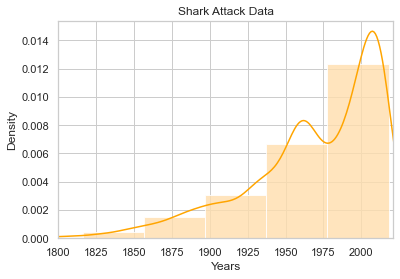

In [1995]:
df17['YEAR'] = df17['YEAR'].replace(0, np.nan)
fig, ax = plt.subplots()
ax = df['YEAR'].hist(bins=50, density=True, stacked=True, color='navajowhite', alpha=0.8)
ax = df17['YEAR'].plot(kind='density', color='orange')
ax.set(title='Shark Attack Data')
ax.set(xlabel='Years')
plt.xlim(1800,2021)
plt.savefig('output/Years Hist.png', dpi =100)
plt.show()
df17['YEAR'] = df17['YEAR'].replace(np.nan, 0)

On the histogram we can see that during the years shark attacks have increased, but from 2000 to 2018 there was a considerable increase.

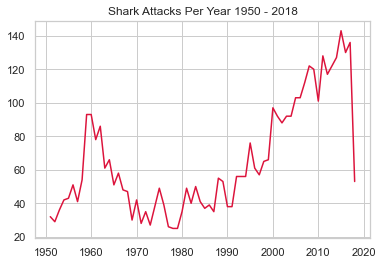

In [1996]:
df17['YEAR_GRAPH'] = df17[df17['YEAR']>1950]['YEAR']
year_counter = df17['YEAR_GRAPH'].value_counts().sort_index()

year_counter.plot(title='Shark Attacks Per Year 1950 - 2018',color = 'crimson')
plt.savefig('output/Attacks Per Year.png')

We can see the increment of attacks mentioned before from 1990 (between 50 and 60 attacks) to aproximately 2016 (with more than 140 attacks).

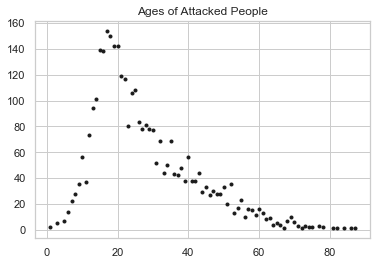

In [1997]:
#https://www.geeksforgeeks.org/python-pandas-series-str-extract/
df17['AGE_GRAPH'] = df17['AGE'].str.extract('([0-9]+)', expand = False).dropna().astype(int)
age_counter = df17['AGE_GRAPH'].value_counts()
age_counter.plot(title = 'Ages of Attacked People',style='.', color = 'k')
plt.savefig('output/Ages of Attacked People.png')

Surfing     1231
Other       1101
Fishing     1098
Swimming    1037
Diving       613
Boarding     194
Bathing      191
Name: ACTIVITY, dtype: int64


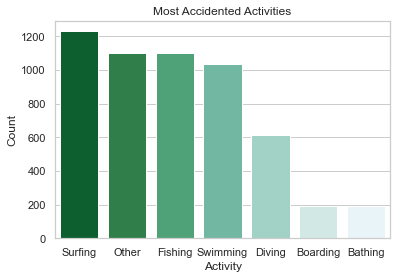

In [1998]:
print(df17['ACTIVITY'].value_counts()[:7])
p = sns.countplot(x='ACTIVITY', data=df17, palette='BuGn_r', order = df17.ACTIVITY.value_counts().iloc[:7].index)
p.axes.xaxis.label.set_text('Activity')
p.axes.yaxis.label.set_text('Count')
p.set_title('Most Accidented Activities')
plt.savefig('output/Most Accidented Activities.png')
plt.show()

White Shark     632
Tiger Shark     250
Bull Shark      167
Whaler Shark     72
Reef Shark       67
Name: SPECIES, dtype: int64


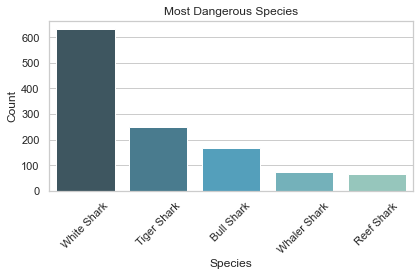

In [1999]:
df18 = df17.copy()
df18['SPECIES'] = df18[df18.SPECIES != 'Unknown']['SPECIES']
print(df18['SPECIES'].value_counts()[0:5])
p = sns.countplot(x='SPECIES', data=df18, palette='GnBu_d', order = df18.SPECIES.value_counts().iloc[0:5].index)
p.set_xticklabels(p.get_xticklabels(),rotation=45)
p.axes.xaxis.label.set_text('Species')
p.axes.yaxis.label.set_text('Count')
p.set_title('Most Dangerous Species')
plt.tight_layout()
plt.savefig('output/Most Dangerous Species.png',dpi = 100)
plt.show()

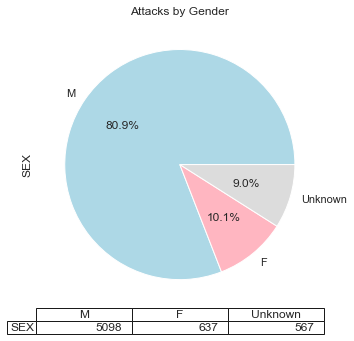

In [2000]:
df17['SEX'].value_counts().plot(kind='pie', rot = 45, autopct = '%1.1f%%', figsize=(5,5), title='Attacks by Gender', colors = ['lightblue','lightpink','gainsboro'], table = True)
plt.tight_layout()
plt.savefig('output/Attacks by Gender.png',dpi=100)
plt.show()

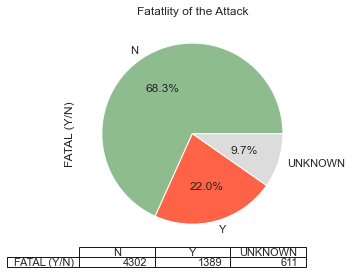

In [2001]:
df17['FATAL (Y/N)'].value_counts().plot(kind='pie', rot = 45, autopct = '%1.1f%%', figsize=(5,5), title='Fatatlity of the Attack', colors = ['darkseagreen','tomato','gainsboro'], table = True)
plt.tight_layout()
plt.savefig('output/Fatality.png',dpi=100)
plt.show()

USA             615
AUSTRALIA       429
SOUTH AFRICA    262
BAHAMAS          49
NEW ZEALAND      45
ITALY            28
REUNION          23
Name: COUNTRY, dtype: int64


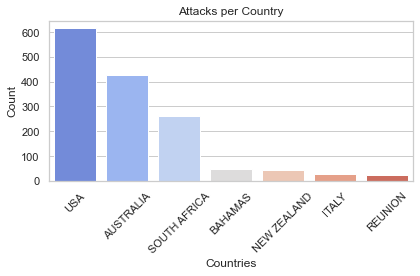

In [2002]:
df18 = df17.copy()
df18['COUNTRY'] = df18[df18.SPECIES != 'Unknown']['COUNTRY']
print(df18['COUNTRY'].value_counts()[0:7])
p = sns.countplot(x='COUNTRY', data=df18, palette='coolwarm', order = df18.COUNTRY.value_counts().iloc[0:7].index)
p.set_xticklabels(p.get_xticklabels(),rotation=45)
p.axes.xaxis.label.set_text('Countries')
p.axes.yaxis.label.set_text('Count')
p.set_title('Attacks per Country')
plt.tight_layout()
plt.savefig('output/Attacks per Country.png',dpi = 100)
plt.show()